# Smoking: Good or Bad? 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/smoking.csv")
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


# Step 0: Data Preprocessing

Let's make sure that our dataset is clean before we analyse.

TODO: create a new dataframe with columns `is_smoker` and `is_alive` containing `int` or `bool` values.
We do this because they make our calculations easier later on when we will perform calculations (aggregate) over them.

In [19]:
# Make a copy of df to start so you don't change the original dataframe. 
# (This also happens if you use .assign, but it's a good insurance policy)
def start_pipeline(dataf):
    return dataf.copy()

def clean_dataframe(dataf):
    ## TODO: return a dataframe with columns `is_smoker` and `is_alive` 
    ## containing `int` or `bool` indicator values for respectively the 'smoker' and 'outcome' column
    return (dataf
    .assign(is_smoker=lambda x: (x["smoker"] == "Yes").astype(np.int),
            is_alive=lambda x: (x["outcome"] == "Alive").astype(np.int))
           )

clean_df = df.pipe(start_pipeline).pipe(clean_dataframe)
clean_df.head()


,is_smoker,is_alive
age,,
18,0.476190,0.952381
19,0.428571,1.000000
20,0.421053,0.947368
21,0.500000,0.937500
22,0.333333,1.000000
...,...,...
80,0.111111,0.000000
81,0.500000,0.000000
82,0.250000,0.000000


# Question 1: what is the probability to live after 20 years, for smokers and non-smokers?

Now that the dataset is clean, the analysis can begin!

In [14]:
def calc_prob_to_live(dataf):
    ## TODO: Calculate the probability to live for smokers and non-smokers.
    ## You can use the indicator columns created above to perform math (a np.mean for each group should work wonders)
    
    return (dataf
            .groupby(['is_smoker'])['is_alive']
            .agg(np.mean)
           )

prob_to_live_df = clean_df.pipe(calc_prob_to_live)
prob_to_live_df.head()

is_smoker
0    0.685792
1    0.761168
Name: is_alive, dtype: float64

---

# Question 2: What? Why? 

Let's see if we can explain why, in our analysis above, smokers seem to have a larger survival rate than non-smokers 

### Effect of Age 

It might be that your age actually has a very large effect on the probability that you will be alive in 20 years or not. Lets quantify that. 

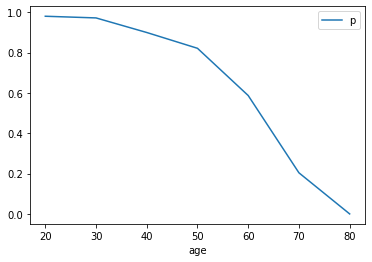

In [21]:
def calc_effect_of_age(dataf):
    # TODO: Transform the data here in such a way that we can plot
    # the effect of age on the probability to live easily.
    # I recommend to bin/group the age column per 10 years, 
    # so that you have more values for each age group. 
    return (dataf
            .assign(age=lambda x: np.round(x["age"] / 10) * 10)
            .groupby("age")
            .agg(p=("is_alive", np.mean))
           )
           

age_effect_df = calc_effect_of_age(clean_df)

# TODO: Plot the probability to live over the age in a linechart
# y axis: probability to live
# x axis: age (bundled in 'bins' of 10 years)
age_effect_df.plot();



---

# Question 3: How does this age effect quantify for smokers and non-smokers?

In our answer on question two, we can see that the probability to live in 20 years decreases once you gets older. That makes sense. 

But how does that differ for smokers and non-smokers?

is_smoker         0         1
age                          
20.0       0.988372  0.971014
30.0       0.971831  0.972973
40.0       0.925620  0.873950
50.0       0.852941  0.803419
60.0       0.622222  0.547009
70.0       0.215517  0.166667
80.0       0.000000  0.000000


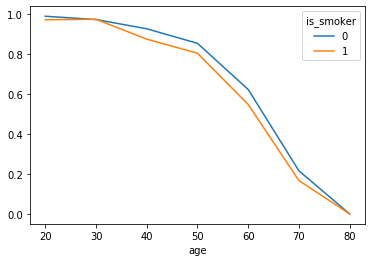

In [20]:
def calc_effect_of_age2(dataf):
    # TODO: Transform the data here in such a way that we can plot
    # the effect of age on the probability to live easily.
    # This time, let's make a line chart for both the smokers and the non-smokers
    # I recommend to bin/group the age column per 10 years, 
    # so that you have more values for each age group.  
    return (dataf
            .assign(age=lambda x: np.round(x["age"] / 10) * 10)
            .groupby(["is_smoker","age"])
            .agg(p=("is_alive", np.mean))
            .reset_index()
            .pivot(index='age', columns='is_smoker', values='p')
           )

age_effect_smoke_vs_nonsmoke = calc_effect_of_age2(clean_df)

# TODO: Plot the probability to live over the age in a linechart
# y axis: probability to live
# x axis: age (bundled in 'bins' of 10 years)
# lines: 1 for smokers, 1 for non-smokers
print(age_effect_smoke_vs_nonsmoke)
age_effect_smoke_vs_nonsmoke.plot();


---

# Question 4: What is the benefit of not smoking for different age groups?
i.e.: 
 - What is the probability to live for smokers for different age groups (e.g. 20s, 30s, ... 80s)
   - you can obtain this data from question 4
 - What is the probability to live for non-smokers for different age groups (e.g. 20s, 30s, ... 80s)
   - you can obtain this data from question 4
 - What is the difference in this probabilty for different age groups (e.g. 20s, 30s, ... 80s)
   - **TODO: calculate this**

In [8]:
## TODO: write the code in this cell and output a table/plot that shows the mentioned difference
# pivot table with probabilities to live of smoke vs nonsmoke per age group 

def diff_smoke_vs_nonsmoke(dataf):
    return (dataf
            .assign(age=lambda x: np.round(x["age"] / 10) * 10)
            .groupby(["is_smoker","age"])
            .agg(p=("is_alive", np.mean))
            .reset_index()
            .pivot(index='age', columns='is_smoker', values='p')
            .assign(difference= lambda x: x[0]-x[1])
           )

difference_smoke_vs_nonsmoke = diff_smoke_vs_nonsmoke(clean_df)
difference_smoke_vs_nonsmoke

is_smoker,0,1,difference
age,,,
20.0,0.988372,0.971014,0.017358
30.0,0.971831,0.972973,-0.001142
40.0,0.925620,0.873950,0.051670
50.0,0.852941,0.803419,0.049522
60.0,0.622222,0.547009,0.075214
70.0,0.215517,0.166667,0.048851
80.0,0.000000,0.000000,0.000000


---

# Conclusion: Is smoking good or bad for your probability to live in 20 years??

In [9]:
# TODO Explain in 2 or three sentences
# Smoking is bad for your probability to live in 20 years. The probability to live in 20 years decreases when you smoke.

## Discussion: What things should/could we take into account when extending this analysis? 

Name at least 2 things

In [10]:
# the amount of people in each age group.
# your probability to live in 20 years decreases as you get older.